In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

LOADING THE DATASET

In [3]:
data = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


SHAPE OF THE DATASET

In [4]:
data.shape

(301, 9)

CHECKING FOR NULL VALUES

In [5]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

CONVERTING THE YEAR COLUMN TO NO.OF YEARS USED

In [6]:
data['current year'] = 2021
data['no.of years used'] = data['current year'] - data['Year']
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current year,no.of years used
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


REMOVING THE COLUMS WHICH ARE NOT GOING TO BE USED

In [7]:
data.drop(['Car_Name','Year','current year'],1,inplace = True)


In [8]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no.of years used
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


CHECKING FOR CATEGORICAL COLUMNS

In [9]:
print(data['Fuel_Type'].unique())
print(data['Seller_Type'].unique())
print(data['Transmission'].unique())
print(data['Owner'].unique())


['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


USING "ONE HOT ENCODING" 

In [10]:
data = pd.get_dummies(data,drop_first=True)
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no.of years used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


SEPARATING THE FEATURES AND TARGET LABEL

In [11]:
X = data.iloc[:,1:]
y = data.iloc[:,0]
print(X)
print(y)

     Present_Price  Kms_Driven  Owner  no.of years used  Fuel_Type_Diesel  \
0             5.59       27000      0                 7                 0   
1             9.54       43000      0                 8                 1   
2             9.85        6900      0                 4                 0   
3             4.15        5200      0                10                 0   
4             6.87       42450      0                 7                 1   
..             ...         ...    ...               ...               ...   
296          11.60       33988      0                 5                 1   
297           5.90       60000      0                 6                 0   
298          11.00       87934      0                12                 0   
299          12.50        9000      0                 4                 1   
300           5.90        5464      0                 5                 0   

     Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0     

CHECKING THE CORRELATION BETWEEN THE INDEPENDENT FEATURES

<AxesSubplot:>

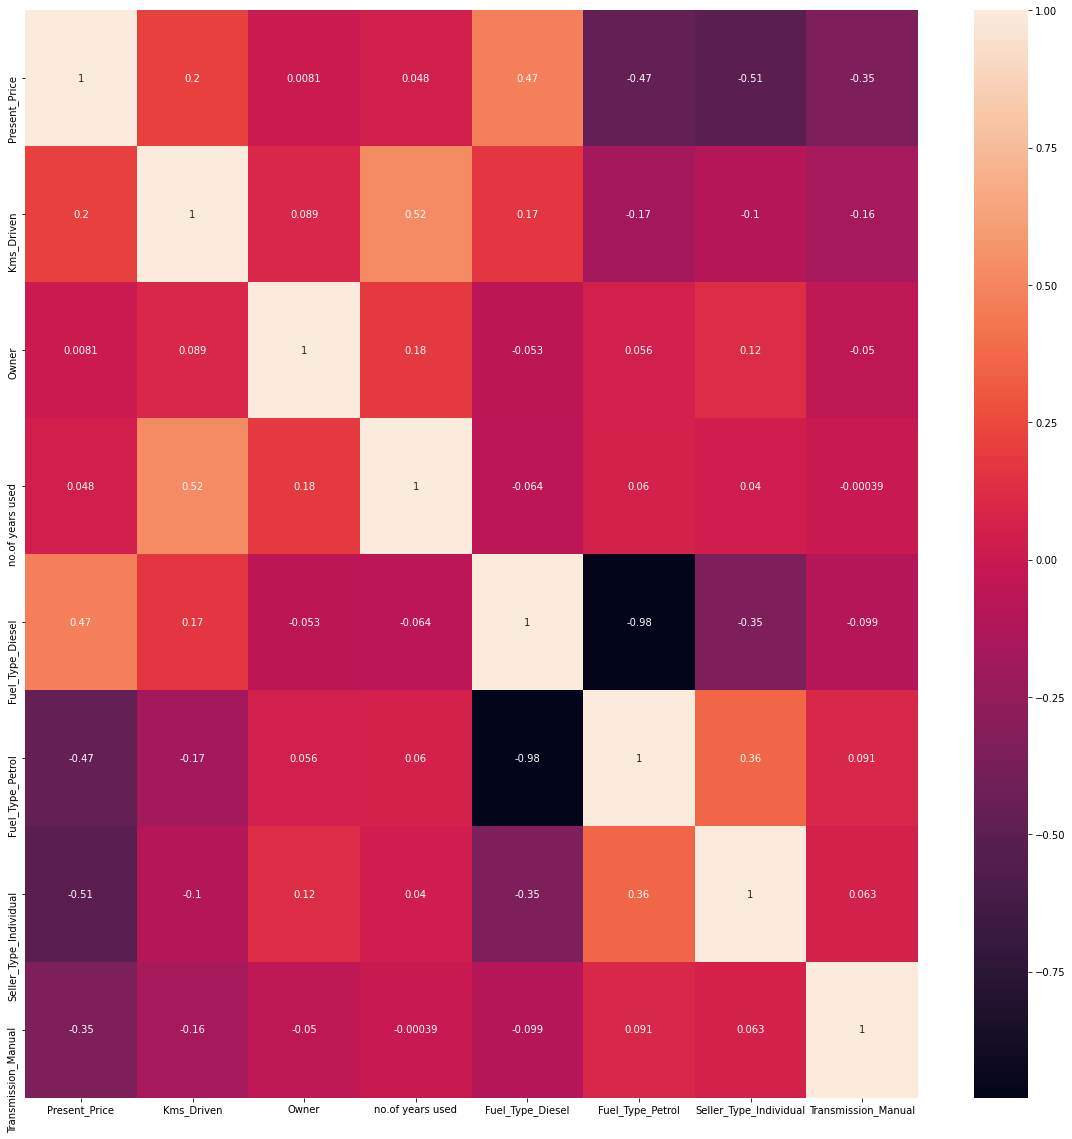

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(X.corr(),annot = True)

CHECKING WHICH FEATURE IS IMPORTANT TO PREDICT THE OUTPUT

Present_Price             0.368079
Fuel_Type_Diesel          0.238486
Transmission_Manual       0.137437
Seller_Type_Individual    0.133429
no.of years used          0.077393
dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

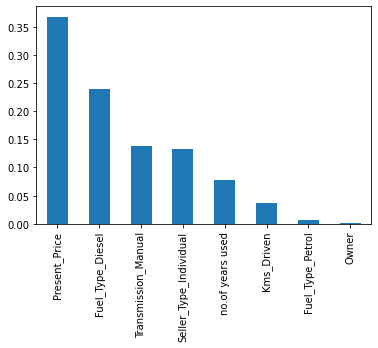

In [13]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)
important_features = pd.Series(model.feature_importances_, index = X.columns)
print(important_features.nlargest(5))
important_features.nlargest(9).plot(kind ='bar')
plt.show

SPLITING THE DATA FOR TRAINING AND TESTING

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
X_train.shape,X_test.shape

((210, 8), (91, 8))

MODEL BUILDING : RANDOM FOREST

In [15]:
#model creation
#MANNUALLY INITIALIZING THE PARAMETERS
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=300,max_features='sqrt',min_samples_leaf=10,random_state=100).fit(X_train,y_train)
predictions=model.predict(X_test)
rmse_value = mean_squared_error(y_test, predictions, squared=False)
rmse_value


2.450637200666254

USING "RandomizedSearchCV" TO FIND THE BEST PARAMETERS 

In [16]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100,5)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [17]:
rf=RandomForestRegressor()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=5,verbose=2,
                               random_state=10,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   59.5s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 32, 55, 77, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 125, 150, 175,
                                                         200]},
                   random_state=10, verbose=2)

FINDIND THE BEST PARAMETER

In [18]:
rf_randomcv.best_params_


{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 77}

USING THE BEST ESTIMATOR TO PREDICT THE RESULTS

In [19]:
best_random_grid=rf_randomcv.best_estimator_
y_pred=best_random_grid.predict(X_test)
rmse_value = mean_squared_error(y_test, y_pred, squared=False)
rmse_value


0.9089617683028618

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


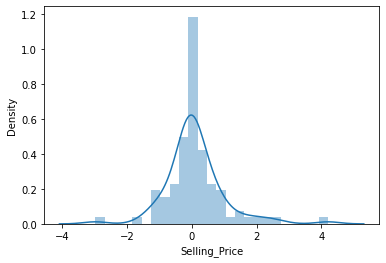

In [20]:
sns.distplot(y_test-y_pred);


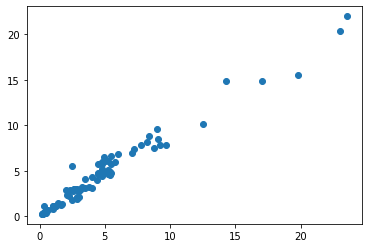

In [21]:
plt.scatter(y_test, y_pred)